In [61]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import nltk
import joblib
import importlib
from wordcloud import WordCloud
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, average_precision_score

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## 3. Preprocesamiento de datos estructurados

En esta sección se realizara el preprocesamiento de los datos
estructurados

In [3]:
df_listings = pd.read_csv('data/listings.csv')

In [4]:
print(df_listings.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [5]:
cols_listings = ['id', 'name', 'description', 
        "host_is_superhost", "host_response_time", "host_response_rate", 
        "host_acceptance_rate","host_listings_count", "host_since",
        "neighbourhood_cleansed","room_type", "property_type", 
        "accommodates", "bathrooms", "bedrooms",
        "beds", "price", "minimum_nights",
        "number_of_reviews", "reviews_per_month", "availability_365", 
        "instant_bookable", "review_scores_rating"]

In [6]:
df_listings = df_listings[cols_listings]

In [7]:
df_listings.head(4)

,id,name,description,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_since,neighbourhood_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,instant_bookable,review_scores_rating
0,35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",f,NaN,NaN,NaN,1.0,2010-06-28,Cuajimalpa de Morelos,...,1.0,1.0,1.0,"$3,982.00",1,0,NaN,363,f,NaN
1,44616,Condesa Haus,A new concept of hosting in mexico through a b...,f,within a few hours,100%,90%,13.0,2010-08-09,Cuauhtémoc,...,NaN,5.0,NaN,NaN,1,65,0.40,364,f,4.59
2,56074,Great space in historical San Rafael,This great apartment is located in one of the ...,f,within a day,88%,100%,1.0,2010-10-19,Cuauhtémoc,...,1.0,1.0,1.0,$585.00,15,84,0.49,361,f,4.87
3,67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",t,within an hour,100%,47%,3.0,2011-01-04,Cuauhtémoc,...,NaN,2.0,NaN,NaN,2,50,0.31,307,f,4.90


In [8]:
df_processed_list = df_listings.copy()

- Transformaremos los datos booleanos a enteros
- Eliminaremos el signo de porciento y pasamos los valores a decimales
- Eliminaremos el signo de dolar

In [9]:
bool_cols = ["host_is_superhost", "instant_bookable"]

In [10]:
print("Tipos de datos:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].dtype)
print("instant_bookable:", df_processed_list["instant_bookable"].dtype)

print("\nValores únicos en host_is_superhost:")
print(df_processed_list["host_is_superhost"].unique())
print("Valores únicos en instant_bookable:")
print(df_processed_list["instant_bookable"].unique())

Tipos de datos:
host_is_superhost: object
instant_bookable: object

Valores únicos en host_is_superhost:
['f' 't' nan]
Valores únicos en instant_bookable:
['f' 't']


In [11]:
df_processed_list["host_is_superhost"] = df_processed_list["host_is_superhost"].map({'t':1, 'f':0})
df_processed_list["instant_bookable"] = df_processed_list["instant_bookable"].map({'t':1, 'f':0})

In [12]:
print("Tipos de datos:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].dtype)
print("instant_bookable:", df_processed_list["instant_bookable"].dtype)

print("\nValores únicos en host_is_superhost:")
print(df_processed_list["host_is_superhost"].unique())
print("Valores únicos en instant_bookable:")
print(df_processed_list["instant_bookable"].unique())

Tipos de datos:
host_is_superhost: float64
instant_bookable: int64

Valores únicos en host_is_superhost:
[ 0.  1. nan]
Valores únicos en instant_bookable:
[0 1]


In [13]:
moda_superhost = mode_value = df_processed_list['host_is_superhost'].mode()[0]
print("moda_superhost: ", moda_superhost)
df_processed_list['host_is_superhost'] = df_processed_list['host_is_superhost'].fillna(mode_value).astype(int)

moda_superhost:  0.0


In [14]:
print("Datos faltantes:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].isnull().sum())
print("instant_bookable:", df_processed_list["instant_bookable"].isnull().sum())

Datos faltantes:
host_is_superhost: 0
instant_bookable: 0


In [15]:
df_processed_list["host_response_rate"] = df_listings["host_response_rate"].str.rstrip("%").astype(float) / 100
df_processed_list["host_acceptance_rate"] = df_listings["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

In [16]:
df_processed_list["price"] = df_listings["price"].str.replace(r"[$,]", "", regex=True).astype(float)

- Transformamos la fecha en que inicio el host a formato de fecha
- Calculamos la cantidad de dias que el host ha estado activo en la plataforma

In [17]:
df_processed_list["host_since"] = pd.to_datetime(df_listings["host_since"])
df_processed_list["host_days"] = (pd.Timestamp.today() - df_processed_list["host_since"]).dt.days

- Imputaremos los datos faltantes de las columnas numericas con la mediana para que los valores imputados sean representativos de la distribucion de los datos
- Los datos faltantes de las columnas categoricas seran imputados con `Unknown`

In [18]:
num_cols = ["host_response_rate","host_acceptance_rate","host_listings_count",
            "accommodates","bathrooms","bedrooms",
            "beds","price", "minimum_nights",
            "number_of_reviews","reviews_per_month","availability_365",
            "host_days"]

In [19]:
faltantes = df_processed_list[num_cols].isnull().sum()
porcentaje = (faltantes / len(df_processed_list)) * 100

print("Resumen de datos faltantes:")
print("-" * 50)
for col in num_cols:
    print(f"{col}: {faltantes[col]} datos faltantes ({porcentaje[col]:.2f}%)")

Resumen de datos faltantes:
--------------------------------------------------
host_response_rate: 3504 datos faltantes (13.44%)
host_acceptance_rate: 2739 datos faltantes (10.51%)
host_listings_count: 5 datos faltantes (0.02%)
accommodates: 0 datos faltantes (0.00%)
bathrooms: 4005 datos faltantes (15.36%)
bedrooms: 971 datos faltantes (3.73%)
beds: 4022 datos faltantes (15.43%)
price: 3999 datos faltantes (15.34%)
minimum_nights: 0 datos faltantes (0.00%)
number_of_reviews: 0 datos faltantes (0.00%)
reviews_per_month: 3261 datos faltantes (12.51%)
availability_365: 0 datos faltantes (0.00%)
host_days: 5 datos faltantes (0.02%)


In [20]:
df_processed_list[num_cols] = df_processed_list[num_cols].fillna(df_processed_list[num_cols].median())

In [21]:
cat_cols = ["host_response_time","neighbourhood_cleansed",
            "room_type","property_type"]

In [22]:
faltantes = df_processed_list[cat_cols].isnull().sum()
porcentaje = (faltantes / len(df_processed_list)) * 100

print("Resumen de datos faltantes:")
print("-" * 50)
for col in cat_cols:
    print(f"{col}: {faltantes[col]} datos faltantes ({porcentaje[col]:.2f}%)")

Resumen de datos faltantes:
--------------------------------------------------
host_response_time: 3504 datos faltantes (13.44%)
neighbourhood_cleansed: 0 datos faltantes (0.00%)
room_type: 0 datos faltantes (0.00%)
property_type: 0 datos faltantes (0.00%)


In [23]:
df_processed_list[cat_cols] = df_processed_list[cat_cols].fillna("Unknown")

Para evitar que se creen demasiadas categorías al utilizar OneHotEncoder se tomarán los primeros valores de las columnas categóricas y el resto se agrupará en una categoría llamada `Other`.

In [24]:
# Mantener top 5 barrios y agrupar resto en 'Other'
top5 = df_listings['neighbourhood_cleansed'].value_counts().nlargest(5).index
df_processed_list['neighbourhood_top'] = df_listings['neighbourhood_cleansed'].where(
    df_listings['neighbourhood_cleansed'].isin(top5), 'Other'
)
print(df_processed_list['neighbourhood_top'].value_counts())

neighbourhood_top
Cuauhtémoc        12030
Miguel Hidalgo     4441
Other              3907
Benito Juárez      2989
Coyoacán           1693
Álvaro Obregón     1007
Name: count, dtype: int64


In [25]:
top_pt = df_listings['property_type'].value_counts().nlargest(10).index
df_processed_list['property_type_top'] = df_listings['property_type'].where(
    df_listings['property_type'].isin(top_pt), 'Other'
)
print(df_processed_list['property_type_top'].value_counts())

property_type_top
Entire rental unit             10024
Entire condo                    3270
Private room in rental unit     2994
Other                           2684
Private room in home            2270
Entire loft                     1497
Entire home                      813
Entire serviced apartment        795
Private room in condo            781
Room in hotel                    530
Private room in guesthouse       409
Name: count, dtype: int64


- Aplicamos el One-Hot encoding
- Agregamos las variables codificadas al dataset y eliminamos las originales
- Aplicamos el StandardScaler a las variables numéricas

In [26]:
# One-hot encoding
cols_to_encode = ['neighbourhood_top', 'room_type', 'property_type_top']
df_ohe = pd.get_dummies(df_processed_list[cols_to_encode], drop_first=True, prefix=cols_to_encode)

In [27]:
# Concatena el dataset procesado con el dataset del encoder, luego elimina las columnas originales
df_encoded_list = pd.concat([df_processed_list, df_ohe], axis=1).drop(
    ['neighbourhood_cleansed','neighbourhood_top',
     'room_type','property_type','property_type_top'],
    axis=1
)

In [28]:
num_cols = [
    "host_response_rate", "host_acceptance_rate", "host_listings_count",
    "host_days", "accommodates", "bathrooms", "bedrooms", "beds",
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"
]

# Instanciar y aplicar scaler
scaler = StandardScaler()
df_encoded_list[num_cols] = scaler.fit_transform(df_encoded_list[num_cols])

Luego de aplicar el scaler verificamos que:
- `mean` tenga un valor igual o cerca de 0.00
- `std` tenga un valor igual o cercano a 1
- `count` es el mismo numero para todas las columnas

In [29]:
df_encoded_list[num_cols].describe().round(2)

,host_response_rate,host_acceptance_rate,host_listings_count,host_days,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.07,-3.82,-0.29,-1.99,-0.99,-1.44,-1.20,-1.10,-0.36,-0.15,-0.63,-0.90,-1.68
25%,0.28,0.26,-0.29,-0.83,-0.57,-0.40,-0.43,-0.49,-0.22,-0.15,-0.58,-0.62,-1.00
50%,0.28,0.39,-0.25,0.16,-0.57,-0.40,-0.43,-0.49,-0.13,-0.11,-0.38,-0.26,0.31
75%,0.28,0.43,-0.14,0.74,0.28,0.12,0.35,0.11,-0.00,-0.11,0.17,0.31,0.96
max,0.28,0.43,9.91,2.81,5.36,49.51,37.71,29.20,109.06,44.65,15.53,31.04,1.13


In [30]:
df_encoded_list.to_parquet(
    "data/processed_listings.parquet", 
    engine='pyarrow', 
    compression='snappy',
    index=False)

print(df_encoded_list.columns.to_list())

['id', 'name', 'description', 'host_is_superhost', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel']


## 4. Integración de texto y datos estructurados
En este apartado se integraran los datos estructurados con los datos de texto
para crear un conjunto de datos mas completo y enriquecido.


In [31]:
df_encoded_list.tail(3)

,id,name,description,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_since,accommodates,...,property_type_top_Entire home,property_type_top_Entire loft,property_type_top_Entire rental unit,property_type_top_Entire serviced apartment,property_type_top_Other,property_type_top_Private room in condo,property_type_top_Private room in guesthouse,property_type_top_Private room in home,property_type_top_Private room in rental unit,property_type_top_Room in hotel
26064,1379781424660291699,Cozy room in Roma Norte,Located in the Colonia Roma Norte (Roma-Condes...,1,within an hour,0.283704,-0.210056,-0.275447,2015-05-31,-0.994815,...,False,False,False,False,False,False,False,False,True,False
26065,1379807014531191212,Stylish suite w private terrace close to Polanco,Tucked away in the lively neighborhood of Anzu...,1,within an hour,0.283704,0.427658,0.312410,2023-05-16,-0.570905,...,False,False,True,False,False,False,False,False,False,False
26066,1379814270520534429,Depto. en el corazón de Roma N,"Apartment with 2 bedrooms, 2 bathrooms, 2 doub...",0,Unknown,0.283704,0.385143,-0.286974,2018-05-12,1.124735,...,False,False,True,False,False,False,False,False,False,False


In [32]:
cols = ['listing_id', 'review_scores_rating', 'processed_comments', 'target']
df_reviews = pd.read_parquet(
    "data/processed_comments.parquet",
    engine='pyarrow',
    columns=cols
)

In [33]:
# df_reviews_final = df_reviews_en[reviews_col]
# df_reviews_final['final_comments'] = df_reviews_final['final_comments'].fillna("")
# df_reviews_final['has_text'] = (df_reviews_final['final_comments'] != "").astype(int)
# print(df_reviews_final.head())

In [34]:
# df = df.rename(columns={"id": "listing_id"})

In [35]:
# print(df.columns)

In [36]:
# print(df_listings["target"].value_counts())

In [37]:
print(df_encoded_list.columns.tolist())
print(df_reviews.columns.tolist())

['id', 'name', 'description', 'host_is_superhost', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel']
['listing_id', '

In [38]:
print(df_encoded_list.shape)
print(df_reviews.shape)

(26067, 39)
(12129, 4)


In [39]:
df_full = pd.merge(
    df_encoded_list,
    df_reviews,
    left_on='id',
    right_on='listing_id',
    how='inner'
)

In [40]:
df_full.shape

(12129, 43)

In [41]:
print(df_full["target"].value_counts())

target
1    11709
0      420
Name: count, dtype: int64


In [42]:
print(df_full.shape)
print(df_full.columns)

(12129, 43)
Index(['id', 'name', 'description', 'host_is_superhost', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365', 'instant_bookable', 'review_scores_rating_x',
       'host_days', 'neighbourhood_top_Coyoacán',
       'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo',
       'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'property_type_top_Entire home',
       'property_type_top_Entire loft', 'property_type_top_Entire rental unit',
       'property_type_top_Entire serviced apartment',
       'property_type_top_Other', 'property_type_top_Private room in condo',
       'property_type_top_Private room in guesthouse',
       'property_type_top_Priva

In [43]:
to_drop = [
    "listing_id", 
    "description",
    "target",
    "name"
]

X = df_full.drop(columns=to_drop)

y = df_full["target"]

In [44]:
print("Shape X:", X.shape)
print("Columns X:", X.columns.tolist())
print("Shape y:", y.shape)
print("Valores únicos en y:", np.bincount(y))

Shape X: (12129, 39)
Columns X: ['id', 'host_is_superhost', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating_x', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel', 'revi

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # 1 negativo : 5 positivos
X_res, y_res = rus.fit_resample(X_train, y_train)

In [46]:
print("Distribución luego de under-sampling:", y_res.value_counts())

Distribución luego de under-sampling: target
1    1680
0     336
Name: count, dtype: int64


## 5. Modelado Predictivo

In [47]:
numeric_features = num_cols + bool_cols + list(df_ohe.columns)
numeric_transformer = 'passthrough'

In [48]:
text_features = "processed_comments"
text_transformer = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1,2),
    stop_words=None,
    norm='l2'
)

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_features),
        ('num',  numeric_transformer, numeric_features),
    ],
    remainder='drop'
)

In [50]:
model = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'F0.5': make_scorer(fbeta_score, beta=0.5, pos_label=1),
    'AUC-PR': make_scorer(average_precision_score, needs_proba=True),
    'Specificity': make_scorer(recall_score, pos_label=0),
    'Accuracy': 'accuracy'
}

In [51]:
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__class_weight': [None, 'balanced']
}

gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring=scoring,
    refit='F0.5',
    cv=cv,
    n_jobs=2,
    verbose=1
)

gs_lr.fit(X_res, y_res)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs_proba'


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('text',
                                                                         TfidfVectorizer(max_features=2000,
                                                                                         ngram_range=(1,
                                                                                                      2)),
                                                                         'processed_comments'),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['host_response_rate',
                                                                          'host_acceptance_rate',
                                                                          'host_listings_count',
                                                                          'host_days',
                                                                          'accommodates',
                                                                          'bathrooms',
                                                                          'b...
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__class_weight': [None, 'balanced']},
             refit='F0.5',
             scoring={'AUC-PR': make_scorer(average_precision_score, response_method='predict', needs_proba=True),
                      'Accuracy': 'accuracy',
                      'F0.5': make_scorer(fbeta_score, response_method='predict', beta=0.5, pos_label=1),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=0)},
             verbose=1)

In [52]:
pipe_svc = Pipeline([
    ('pre', preprocessor),
    ('clf', SVC(probability=True))
])

param_grid_svc = {
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.1, 1, 10],
    'clf__class_weight': [None, 'balanced']
}

gs_svc = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid_svc,
    scoring=scoring,
    refit='F0.5',
    cv=cv,
    n_jobs=2,
    verbose=1
)
gs_svc.fit(X_res, y_res)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/tux/airbnb_comments/env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs_proba'


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('text',
                                                                         TfidfVectorizer(max_features=2000,
                                                                                         ngram_range=(1,
                                                                                                      2)),
                                                                         'processed_comments'),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['host_response_rate',
                                                                          'host_acceptance_rate',
                                                                          'host_listings_count',
                                                                          'host_days',
                                                                          'accommodates',
                                                                          'bathrooms',
                                                                          'b...
                         'clf__class_weight': [None, 'balanced'],
                         'clf__kernel': ['linear', 'rbf']},
             refit='F0.5',
             scoring={'AUC-PR': make_scorer(average_precision_score, response_method='predict', needs_proba=True),
                      'Accuracy': 'accuracy',
                      'F0.5': make_scorer(fbeta_score, response_method='predict', beta=0.5, pos_label=1),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=0)},
             verbose=1)

## 6. Evaluación del modelo

In [63]:
print("=== Logistic Regression ===")
print("Mejores parámetros:", gs_lr.best_params_)
print("F1 en CV:", gs_lr.best_score_)

# 1) Predicciones y probabilidades
y_pred_lr = gs_lr.best_estimator_.predict(X_test)
y_proba_lr = gs_lr.best_estimator_.predict_proba(X_test)[:, 1]  # probabilidad clase “Bueno”

# 2) Accuracy
acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc:.3f}")

# 3) Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión:\n", cm)

=== Logistic Regression ===
Mejores parámetros: {'clf__C': 10, 'clf__class_weight': 'balanced'}
F1 en CV: 0.9591152997014778
Accuracy: 0.937
Matriz de confusión:
 [[  73   11]
 [ 142 2200]]


In [64]:
# 4) Informe detallado
print(classification_report(y_test, y_pred_lr, target_names=['Malo','Bueno']))

              precision    recall  f1-score   support

        Malo       0.34      0.87      0.49        84
       Bueno       1.00      0.94      0.97      2342

    accuracy                           0.94      2426
   macro avg       0.67      0.90      0.73      2426
weighted avg       0.97      0.94      0.95      2426



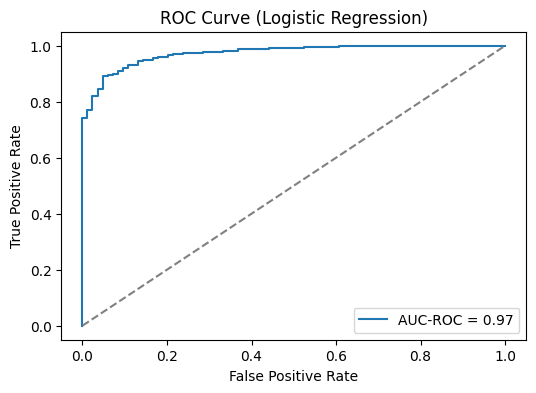

In [65]:
# 5) Curva ROC + AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()



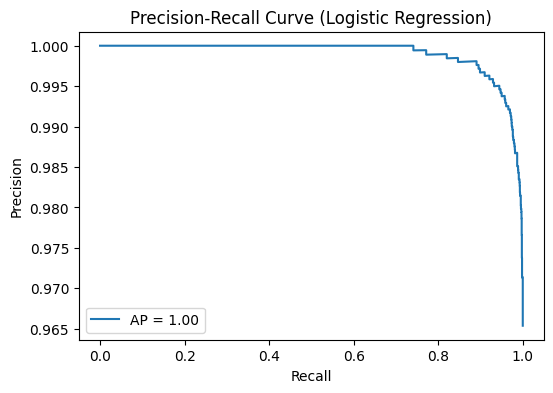

In [66]:
# 6) Curva Precision-Recall + AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
ap = average_precision_score(y_test, y_proba_lr)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.show()



In [ ]:
# 1) Accede al preprocesador
pre = gs_lr.best_estimator_.named_steps['pre']

# 2) Extrae el vectorizador de texto (clave 'text')
tfidf = pre.named_transformers_['text']

# 3) Extrae la lista de columnas numéricas (passthrough bajo 'num')
numeric_feats = pre.transformers_[1][2]

# 4) Construye la lista de nombres en el mismo orden que se concatenan
feat_names = list(tfidf.get_feature_names_out()) + numeric_feats

# 5) Obtén los coeficientes del clasificador
coefs = gs_lr.best_estimator_.named_steps['clf'].coef_[0]

# 6) Muestra, por ejemplo, el top 10 positivos y negativos

top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top 10 tokens/features que predicen 'Bueno':")
for i in top_pos[::-1]:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")

print("\nTop 10 tokens/features que predicen 'Malo':")
for i in top_neg:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")


Top 10 tokens/features que predicen 'Bueno':
  number_of_reviews (coef = 4.931)
  host_is_superhost (coef = 4.076)
  excellent (coef = 3.626)
  awesome (coef = 3.545)
  home (coef = 3.229)
  couch (coef = 3.169)
  clean (coef = 3.152)
  todo (coef = 3.125)
  jacuzzi (coef = 3.030)
  fantastic (coef = 3.013)

Top 10 tokens/features que predicen 'Malo':
  not (coef = -6.080)
  accommodation (coef = -4.617)
  old (coef = -4.285)
  find (coef = -3.390)
  wifi (coef = -3.370)
  cancel (coef = -3.289)
  mall (coef = -3.209)
  no (coef = -3.146)
  confortable (coef = -2.954)
  shower (coef = -2.903)


In [70]:
# Top 10 más positivas y top 10 más negativas
top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top 10 tokens/features que predicen 'Bueno':")
for i in top_pos[::-1]:
    print(f"  {feat_names[i]}: coef = {coefs[i]:.3f}")

print("\nTop 10 tokens/features que predicen 'Malo':")
for i in top_neg:
    print(f"  {feat_names[i]}: coef = {coefs[i]:.3f}")

Top 10 tokens/features que predicen 'Bueno':
  number_of_reviews: coef = 4.931
  host_is_superhost: coef = 4.076
  excellent: coef = 3.626
  awesome: coef = 3.545
  home: coef = 3.229
  couch: coef = 3.169
  clean: coef = 3.152
  todo: coef = 3.125
  jacuzzi: coef = 3.030
  fantastic: coef = 3.013

Top 10 tokens/features que predicen 'Malo':
  not: coef = -6.080
  accommodation: coef = -4.617
  old: coef = -4.285
  find: coef = -3.390
  wifi: coef = -3.370
  cancel: coef = -3.289
  mall: coef = -3.209
  no: coef = -3.146
  confortable: coef = -2.954
  shower: coef = -2.903


In [71]:
print("=== Support Vector Machine ===")
print("Mejores parámetros:", gs_svc.best_params_)
print("F1 en CV:", gs_svc.best_score_)
y_pred_svc = gs_svc.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_svc, target_names=['Malo','Bueno']))

# 1) Predicciones y probabilidades
y_pred_svc = gs_svc.best_estimator_.predict(X_test)
y_proba_svc = gs_svc.best_estimator_.predict_proba(X_test)[:, 1]  # probabilidad clase “Bueno”

# 2) Accuracy
acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc:.3f}")

# 3) Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión:\n", cm)

=== Support Vector Machine ===
Mejores parámetros: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf'}
F1 en CV: 0.9606646918493137
              precision    recall  f1-score   support

        Malo       0.51      0.82      0.63        84
       Bueno       0.99      0.97      0.98      2342

    accuracy                           0.97      2426
   macro avg       0.75      0.90      0.80      2426
weighted avg       0.98      0.97      0.97      2426

Accuracy: 0.937
Matriz de confusión:
 [[  73   11]
 [ 142 2200]]


In [72]:
# 4) Informe detallado
print(classification_report(y_test, y_pred_svc, target_names=['Malo','Bueno']))

              precision    recall  f1-score   support

        Malo       0.51      0.82      0.63        84
       Bueno       0.99      0.97      0.98      2342

    accuracy                           0.97      2426
   macro avg       0.75      0.90      0.80      2426
weighted avg       0.98      0.97      0.97      2426



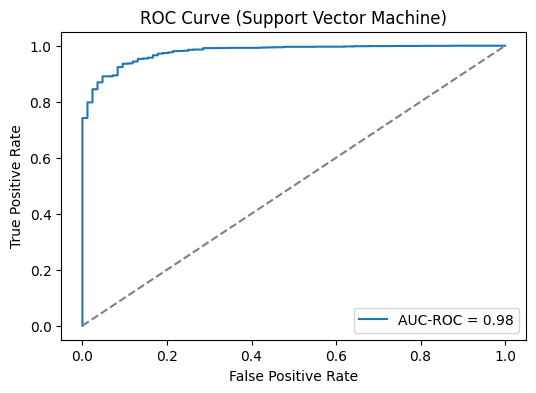

In [73]:
# 5) Curva ROC + AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_svc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Support Vector Machine)")
plt.legend()
plt.show()


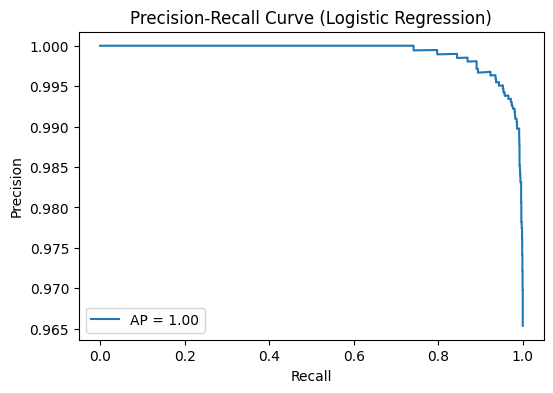

In [74]:
# 6) Curva Precision-Recall + AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_proba_svc)
ap = average_precision_score(y_test, y_proba_svc)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.show()

## 7. Visualización de Resultados

In [77]:
import shap

SHAP para el modelo de regresión logística

/home/tux/airbnb_comments/env/lib/python3.10/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


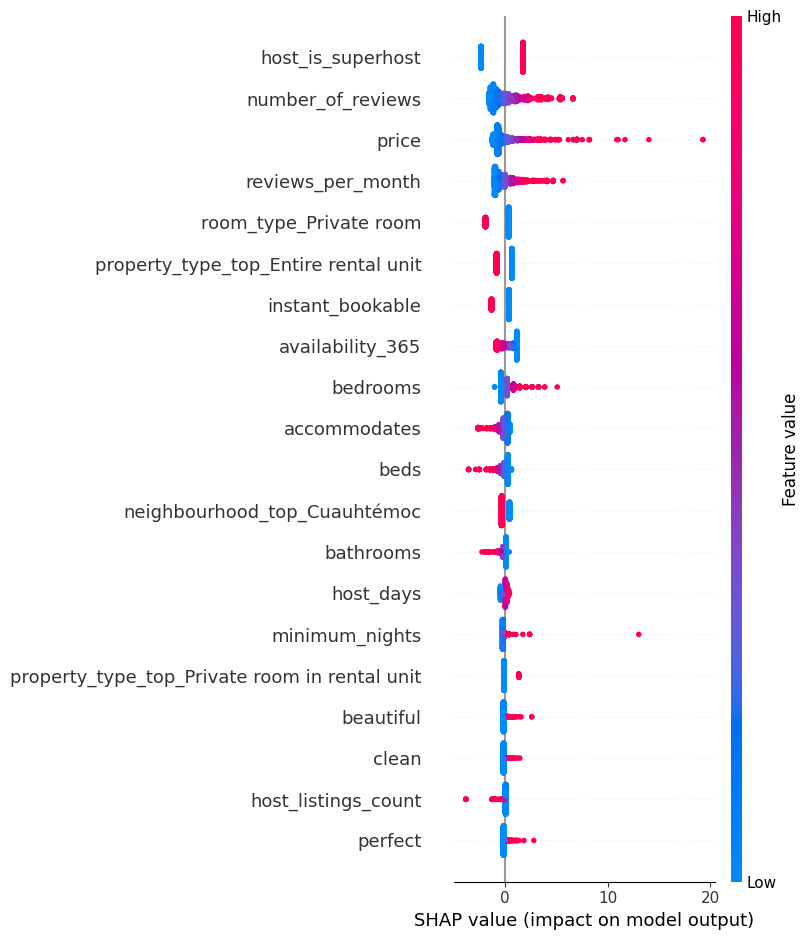

In [78]:
best_lr = gs_lr.best_estimator_
best_lr.fit(X_res, y_res)

# 2) Extrae el preprocesador y arma un pipeline que transforme X_test
pre = best_lr.named_steps['pre']
X_test_trans = pre.transform(X_test)  # matriz numpy o sparse

# 3) Instanciar el explainer
explainer = shap.LinearExplainer(
    best_lr.named_steps['clf'],        # el estimador lineal
    X_test_trans,                      # datos de referencia para el background
    feature_perturbation="interventional"
)

# 4) Calcula valores SHAP para una muestra de test
shap_values = explainer.shap_values(X_test_trans[:1000])  # e.g., primeras 1000 filas

# 5) Grafica un summary plot
feat_names = (best_lr
              .named_steps['pre']
              .named_transformers_['text']
              .get_feature_names_out().tolist()
             ) + numeric_feats

shap.summary_plot(
    shap_values, 
    X_test_trans[:1000].toarray() if hasattr(X_test_trans, "toarray") else X_test_trans,
    feature_names=feat_names,
    max_display=20
)